In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

----
## South

In [3]:
sweep_dir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0'
gaia_edr3_dir = '/global/cscratch1/sd/adamyers/gaiaedr3match/south'
sweep_paths_all = sorted(glob.glob(os.path.join(sweep_dir, '*.fits')))

In [4]:
sweep_paths = []
for sweep_path in sweep_paths_all:

    brick = sweep_path[-20:-5]
    ramin = float(brick[0:3])
    ramax = float(brick[8:11])
    decmin = float(brick[4:7])
    decmax = float(brick[-3:])
    if brick[3]=='m':
        decmin = -decmin
    if brick[-4]=='m':
        decmax = -decmax

    if (ramin>=140) and (ramax<=240) and (decmin>=0) and (decmax<=30):
        sweep_paths.append(sweep_path)

print(len(sweep_paths))

60


In [ ]:
sweep_columns = ['RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'TYPE', 'MASKBITS', 'FRACFLUX_R']
gaia_columns = ['REF_ID', 'EDR3_RA', 'EDR3_DEC', 'EDR3_PHOT_G_MEAN_MAG', 'EDR3_PHOT_BP_MEAN_MAG', 'EDR3_PHOT_RP_MEAN_MAG', 'EDR3_PHOT_G_MEAN_FLUX_OVER_ERROR']
gaia_columns_new = ['SOURCE_ID', 'GAIA_RA', 'GAIA_DEC', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG', 'PHOT_G_MEAN_FLUX_OVER_ERROR']

cat = []
for sweep_path in sweep_paths:
    
    sweep_fn = os.path.basename(sweep_path)
    gaia_path = os.path.join(gaia_edr3_dir, sweep_fn.replace('.fits', '-gaiaedr3match.fits'))
    # print(gaia_path)
    
    gaia = Table(fitsio.read(gaia_path, columns=gaia_columns))
    gaia.rename_columns(gaia_columns, gaia_columns_new)
    mask = (gaia['PHOT_G_MEAN_MAG']!=0) & (gaia['PHOT_BP_MEAN_MAG']!=0) & (gaia['PHOT_RP_MEAN_MAG']!=0)
    mask &= (gaia['PHOT_G_MEAN_MAG']>16) & (gaia['PHOT_G_MEAN_MAG']<18)
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']<0) | (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']>3)
    idx = np.where(mask)[0]
    if len(idx)>0:
        print(sweep_fn, len(idx))
        gaia = gaia[mask]
        
        sweep = Table(fitsio.read(sweep_path, columns=sweep_columns, rows=idx))
        sweep = hstack([sweep, gaia])
        cat.append(sweep)
cat = vstack(cat)
print(len(cat))

In [ ]:
cat.write('/global/cfs/cdirs/desi/users/rongpu/misc/dr9_south_gaia_reddest_and_bluest.fits')

In [5]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/misc/dr9_south_gaia_reddest_and_bluest.fits'))

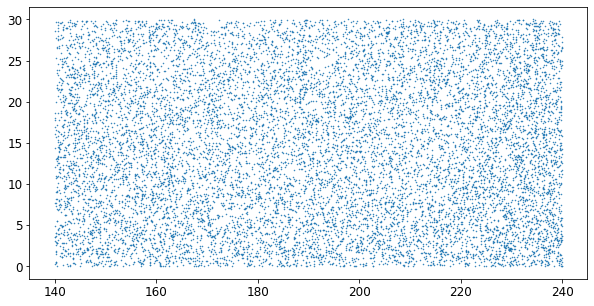

0.6190246257846451
0.6185417672621922
0.6102526959600837
7583


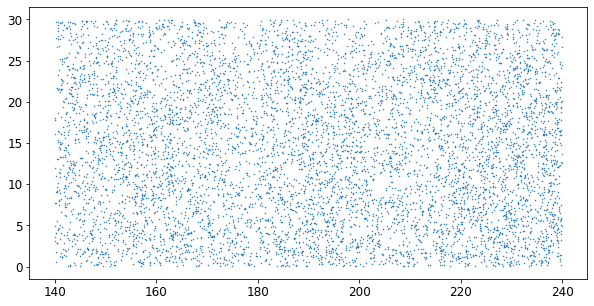

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=1)
plt.show()

mask = (cat['MASKBITS']==0)
print(np.sum(mask)/len(mask))
mask &= cat['TYPE']=='PSF'
print(np.sum(mask)/len(mask))
mask &= cat['FRACFLUX_R']<0.1
print(np.sum(mask)/len(mask))
print(np.sum(mask))

plt.figure(figsize=(10, 5))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=1)
plt.show()

----
## North

In [7]:
sweep_dir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0'
gaia_edr3_dir = '/global/cscratch1/sd/adamyers/gaiaedr3match/north'
sweep_paths_all = sorted(glob.glob(os.path.join(sweep_dir, '*.fits')))

In [8]:
sweep_paths = []
for sweep_path in sweep_paths_all:

    brick = sweep_path[-20:-5]
    ramin = float(brick[0:3])
    ramax = float(brick[8:11])
    decmin = float(brick[4:7])
    decmax = float(brick[-3:])
    if brick[3]=='m':
        decmin = -decmin
    if brick[-4]=='m':
        decmax = -decmax

    # if (ramin>=100) and (ramax<=280) and (decmin>=30) and (decmax<=80):
    if (decmin>=30) and (decmax<=80):
        sweep_paths.append(sweep_path)

print(len(sweep_paths))

216


In [ ]:
sweep_columns = ['RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'TYPE', 'MASKBITS', 'FRACFLUX_R']
gaia_columns = ['REF_ID', 'EDR3_RA', 'EDR3_DEC', 'EDR3_PHOT_G_MEAN_MAG', 'EDR3_PHOT_BP_MEAN_MAG', 'EDR3_PHOT_RP_MEAN_MAG', 'EDR3_PHOT_G_MEAN_FLUX_OVER_ERROR']
gaia_columns_new = ['SOURCE_ID', 'GAIA_RA', 'GAIA_DEC', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG', 'PHOT_G_MEAN_FLUX_OVER_ERROR']

cat = []
for sweep_path in sweep_paths:
    
    sweep_fn = os.path.basename(sweep_path)
    gaia_path = os.path.join(gaia_edr3_dir, sweep_fn.replace('.fits', '-gaiaedr3match.fits'))
    # print(gaia_path)
    
    gaia = Table(fitsio.read(gaia_path, columns=gaia_columns))
    gaia.rename_columns(gaia_columns, gaia_columns_new)
    mask = (gaia['PHOT_G_MEAN_MAG']!=0) & (gaia['PHOT_BP_MEAN_MAG']!=0) & (gaia['PHOT_RP_MEAN_MAG']!=0)
    mask &= (gaia['PHOT_G_MEAN_MAG']>16) & (gaia['PHOT_G_MEAN_MAG']<18)
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']<0) | (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']>3)
    idx = np.where(mask)[0]
    if len(idx)>0:
        print(sweep_fn, len(idx))
        gaia = gaia[mask]
        
        sweep = Table(fitsio.read(sweep_path, columns=sweep_columns, rows=idx))
        sweep = hstack([sweep, gaia])
        cat.append(sweep)
cat = vstack(cat)
print(len(cat))

In [ ]:
cat.write('/global/cfs/cdirs/desi/users/rongpu/misc/dr9_north_gaia_reddest_and_bluest.fits')

In [ ]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/misc/dr9_north_gaia_reddest_and_bluest.fits'))

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=1)
plt.show()

mask = (cat['MASKBITS']==0)
print(np.sum(mask)/len(mask))
mask &= cat['TYPE']=='PSF'
print(np.sum(mask)/len(mask))
mask &= cat['FRACFLUX_R']<0.1
print(np.sum(mask)/len(mask))
mask &= (cat['RA']>80) & (cat['RA']<300) & (cat['DEC']>33)
print(np.sum(mask)/len(mask))
print(np.sum(mask))

plt.figure(figsize=(10, 5))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=1)
plt.show()

In [ ]:
mask = (cat['FLUX_G']>0) & (cat['FLUX_R']>0) & (cat['FLUX_Z']>0)
print(np.sum(mask)/len(mask))